In [8]:
!pip install pandas
!pip install pandas-datareader
!pip install yfinance

In [17]:
import pandas as pd 
import pandas_datareader as pdr
import datetime
import yfinance as yf

Get inflation rate

In [20]:
start = datetime.datetime(1900, 1, 1)
end = datetime.datetime.now()

# We use CPIAUCSL (Consumer Price Index for All Urban Consumers)
# Since it goes back all the way to 1947
inflation = pdr.DataReader(['CPIAUCSL'], 'fred', start, end)
inflation

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2021-09-01,274.214
2021-10-01,276.590
2021-11-01,278.524


Make inflation rate annual so that other metrics can match (not every indicator give us monthly values)

In [21]:
# Function to make a dataframe into annual increments
def make_annual(df):
    df['year'] = df.index.year
    df = df.drop_duplicates(subset=['year'], keep='last').copy()
    df = df.set_index('year')
    return df

In [22]:
inflation = make_annual(inflation)
inflation

,CPIAUCSL
year,
1947,23.410
1948,24.050
1949,23.610
1950,24.980
1951,26.470
...,...
2018,252.551
2019,258.263
2020,261.564


<AxesSubplot:xlabel='year'>

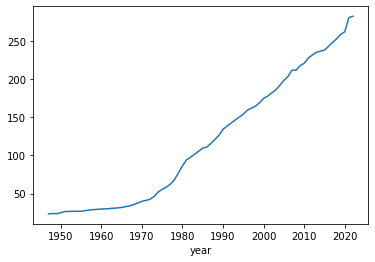

In [23]:
inflation['CPIAUCSL'].plot()

Convert actual values into rates of change

In [25]:
inflation['CPI Change'] = inflation['CPIAUCSL'].pct_change()
inflation

,CPIAUCSL,CPI Change
year,,
1947,23.410,NaN
1948,24.050,0.027339
1949,23.610,-0.018295
1950,24.980,0.058026
1951,26.470,0.059648
...,...,...
2018,252.551,0.019152
2019,258.263,0.022617
2020,261.564,0.012782


<AxesSubplot:xlabel='year'>

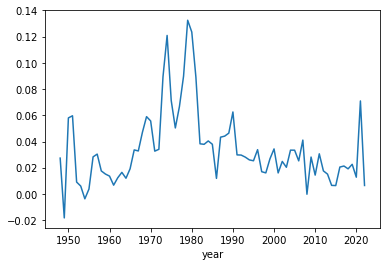

In [27]:
inflation['CPI Change'].plot()

Get the federal debt over time

In [28]:
# We use (Gross Federal Debt as Percent of Gross Domestic Product)
# Since it goes back to 1939
debt_to_gdp = pdr.DataReader(['GFDGDPA188S'], 'fred', start, end)
debt_to_gdp

,GFDGDPA188S
DATE,
1939-01-01,51.58556
1940-01-01,49.27162
1941-01-01,44.46713
1942-01-01,47.72464
1943-01-01,70.21725
...,...
2015-01-01,99.52805
2016-01-01,104.51666
2017-01-01,103.72737


In [29]:
# Use our make annual function so that we have the same index to merge on
debt_to_gdp = make_annual(debt_to_gdp)
debt_to_gdp = debt_to_gdp.rename(columns={'GFDGDPA188S': 'Fed Debt to GDP'})
debt_to_gdp

,Fed Debt to GDP
year,
1939,51.58556
1940,49.27162
1941,44.46713
1942,47.72464
1943,70.21725
...,...
2015,99.52805
2016,104.51666
2017,103.72737


<AxesSubplot:xlabel='year'>

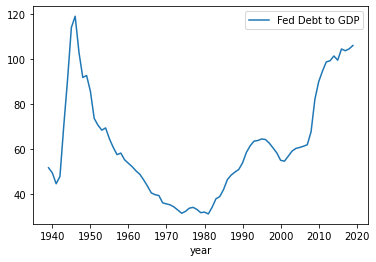

In [30]:
debt_to_gdp.plot()

In [37]:
df_all = inflation[['CPI Change']].merge(debt_to_gdp, on=None, how='outer') 
df_all.plot(secondary_y=['CPI Change'], figsize=(15, 7))

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

Get S&P 500 Data

In [38]:
sp500_ticker = yf.Ticker('^GSPC')
sp500 = sp500_ticker.history(period="max")[['Close']]
sp500 = make_annual(sp500)
sp500

,Close
year,
1950,20.430000
1951,23.770000
1952,26.570000
1953,24.809999
1954,35.980000
...,...
2018,2506.850098
2019,3230.780029
2020,3756.070068


<AxesSubplot:xlabel='year'>

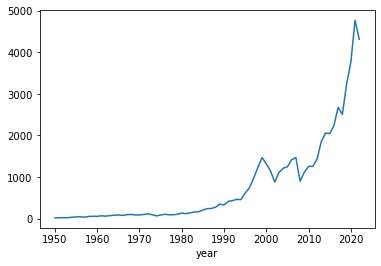

In [40]:
sp500['Close'].plot()

In [44]:
sp500['SP500 Chng'] = sp500['Close'].pct_change()
sp500

,Close,SP500,SP500 Chng
year,,,
1950,20.430000,NaN,NaN
1951,23.770000,0.163485,0.163485
1952,26.570000,0.117796,0.117796
1953,24.809999,-0.066240,-0.066240
1954,35.980000,0.450222,0.450222
...,...,...,...
2018,2506.850098,-0.062373,-0.062373
2019,3230.780029,0.288781,0.288781
2020,3756.070068,0.162589,0.162589


<AxesSubplot:xlabel='year'>

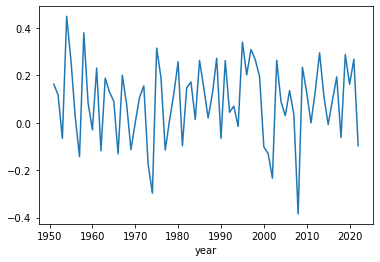

In [45]:
sp500['SP500 Chng'].plot()

<AxesSubplot:xlabel='year'>

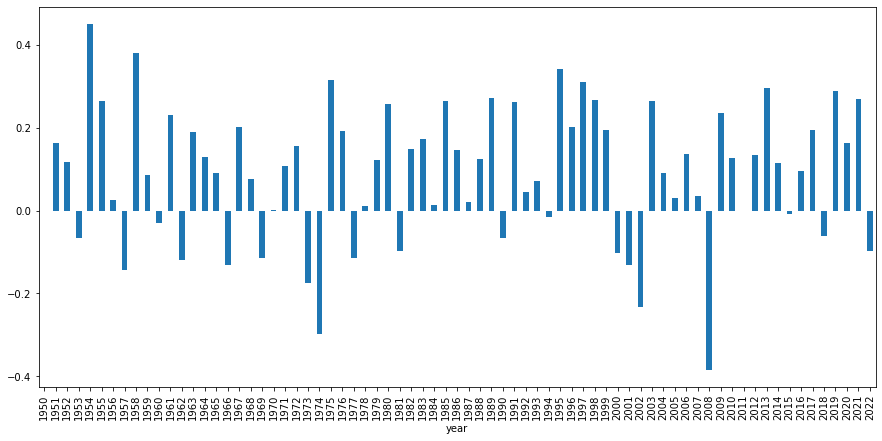

In [47]:
sp500['SP500 Chng'].plot.bar(figsize=(15, 7))

In [48]:
sp500['SP500 Avg Chng'] = sp500['SP500 Chng'].rolling(5).mean()
sp500

,Close,SP500,SP500 Chng,SP500 Avg Chng
year,,,,
1950,20.430000,NaN,NaN,NaN
1951,23.770000,0.163485,0.163485,NaN
1952,26.570000,0.117796,0.117796,NaN
1953,24.809999,-0.066240,-0.066240,NaN
1954,35.980000,0.450222,0.450222,NaN
...,...,...,...,...
2018,2506.850098,-0.062373,-0.062373,0.066764
2019,3230.780029,0.288781,0.288781,0.101738
2020,3756.070068,0.162589,0.162589,0.135709


<AxesSubplot:xlabel='year'>

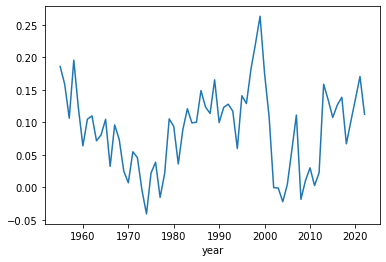

In [49]:
sp500['SP500 Avg Chng'].plot()

In [ ]:
df_debt_sp = debt_to_gdp.merge(sp500['SP500 Avg Chng'], on=None, how='outer')
df_debt_sp.plot(secondary_y=['Fed Debt to GDP'], figsize=(15, 7))